In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import random

**Conditional Probability **

1. Both children are girls and the older child is a girl
2. Both children are girls and at least one of the children is a girl

In [6]:
def random_kid():
    return random.choice(["boy", "girl"])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
         both_girls += 1
    if older == "girl" or younger == "girl":
         either_girl += 1
            
print("P(both | older):", both_girls / older_girl) # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


**Continuous Distribution**

In [8]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

In [17]:
for _ in np.arange(-1,5,0.1):
    print(uniform_pdf(_))

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [16]:
for _ in np.arange(-1,5,0.1):
    print(uniform_cdf(_))

0
0
0
0
0
0
0
0
0
0
0
0.09999999999999964
0.19999999999999973
0.2999999999999998
0.3999999999999997
0.49999999999999956
0.5999999999999996
0.6999999999999997
0.7999999999999996
0.8999999999999995
0.9999999999999996
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [18]:
import matplotlib.pyplot as plt

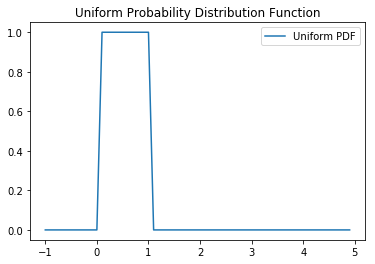

In [20]:
#Plotting Uniform PDF
xs = np.arange(-1,5,0.1)
plt.plot(xs,[uniform_pdf(x) for x in xs],'-',label='Uniform PDF')
plt.legend()
plt.title("Uniform Probability Distribution Function")
plt.show()

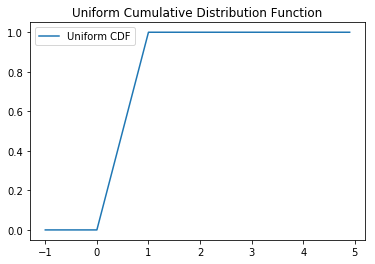

In [21]:
#Plotting Uniform CDF
xs = np.arange(-1,5,0.1)
plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label='Uniform CDF')
plt.legend()
plt.title("Uniform Cumulative Distribution Function")
plt.show()

**Normal Distributions**


In [22]:
import math

In [27]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))


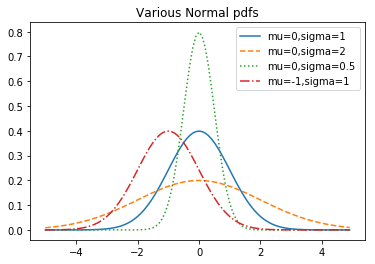

In [28]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()


**Error / Sigmoid Function**

In [30]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

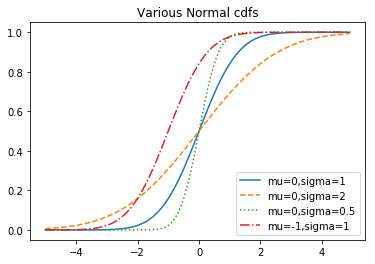

In [31]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()


In [32]:
#Using Python 3.8 Features xD
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [34]:
from collections import Counter

In [35]:
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")

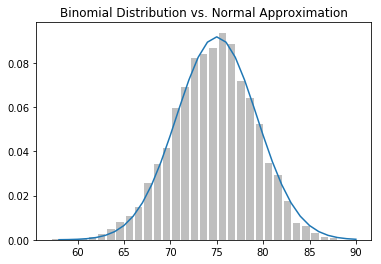

In [38]:
binomial_histogram(0.75,100,10000)

> Thus for large values of n we see that Binomial Distribution approximates to Normal Distribution 